# Lab 2

1. 提交作業之前，建議可以先點選上方工具列的**Kernel**，再選擇**Restart & Run All**，檢查一下是否程式跑起來都沒有問題，最後記得儲存。
2. 請先填上下方的姓名(name)及學號(stduent_id)再開始作答，例如：
```python
name = "我的名字"
student_id= "B06201000"
```
3. 四個求根演算法的實作可以參考[lab-2](https://yuanyuyuan.github.io/itcm/lab-2.html)，裡面有教學影片也有範例程式可以套用。
4. **Deadline: 10/9(Wed.)**

In [31]:
name = "馬宗儀"
student_id = "b06201006"

---

# Exercise 1 - Newton

### Use the Newton's method to find roots of
### $$f(x)=cosh(x)+cos(x)-c \text{, for } c=1, 2, 3,$$

---

### Import libraries

In [32]:
import matplotlib.pyplot as plt
import numpy as np

### 1. Define the function $g(c)(x)=f(x)=cosh(x)+cos(x)-c$ with parameter $c=1, 2, 3$ and its derivative $df$.

In [33]:
def g(c):
    assert c == 1 or c == 2 or c == 3
    def f(x):
        # Hint: return ...
        # ===== 請實做程式 =====
        a=np.cosh(x)+np.cos(x)-c
        return a
        # ====================
    return f

def df(x):
    # Hint: return ...
    # ===== 請實做程式 =====
    b=np.sinh(x)-np.sin(x)
    return b
    # ====================

Pass the following assertion.

In [34]:
assert g(1)(0) == np.cosh(0) + np.cos(0) - 1
assert df(0) == 0

### 2. Implement the algorithm

In [66]:
def newton(
    func,
    d_func,
    x_0,
    tolerance=1e-7,
    max_iterations=5,
    report_history=False
):
    '''
    Parameters
    ----------
    func : function
        The target function.
    d_func : function
        The derivative of the target function.
    x_0 : float
        Initial guess point for a solution f(x)=0.
    tolerance : float
        One of the termination conditions. Error tolerance.
    max_iterations : int
        One of the termination conditions. The amount of iterations allowed.
    report_history: bool
        Whether to return history.

    Returns
    -------
    solution : float
        Approximation of the root.
    history: dict
        Return history of the solving process if report_history is True.
    '''
    
    # ===== 請實做程式 =====
    x_n=x_0
    iterations=0
    if report_history:
            history={'estimation': [], 'error': []}
    while True:
        f_n=func(x_n)
        
        error=abs(f_n)
        
        if report_history:
                history['estimation'].append(x_n)
                history['error'].append(error)
        
        if error<tolerance: 
            if report_history:
                return (x_n, history)
            else:
                return x_n
        if iterations>=max_iterations:
            return None
        
        df_n=d_func(x_n)
        
        x_n=x_n-f_n/df_n
        
        iterations+=1
        
 
    
   
    # ====================

Test your implementation with the assertion below.

In [67]:
root = newton(
    lambda x: x**2 - x - 1, 
    lambda x: 2*x - 1, 
    1.2, 
    max_iterations=100, 
    tolerance=1e-7, 
    report_history=False
)
assert abs(root - ((1 + np.sqrt(5)) / 2)) < 1e-7

---

### 3. Answer the following questions under the case $c=1$.

### Plot the function to find an interval that contains the zero of $f$ if possible.

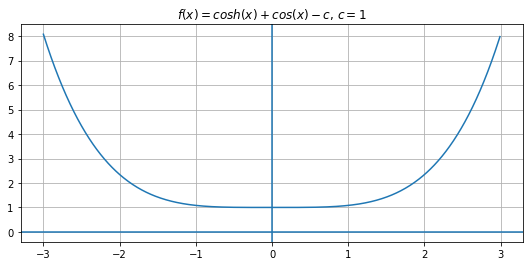

In [68]:
c = 1
f = g(c)

# Hint: search_range = np.arange(左端點, 右端點, 點與點之間距), 
# e.g. search_range = np.arange(0.0, 1.0, 0.01)
# ===== 請實做程式 =====
search_range = np.arange(-3.0, 3.0, 0.01)
# ====================

fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(x)=cosh(x)+cos(x)-c$, $c=$%d' % c)
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### According to the figure above, estimate the zero of $f$.

#### For example, 

~~~python
root = 3        # 單根
root = -2, 1    # 多根
root = None     # 無解
~~~

In [69]:
# Hint: root = ?
# ===== 請實做程式 =====
root = newton(
    g(1), 
    df, 
    1.2, 
    tolerance=1e-10,
    max_iterations=100,  
    report_history=False
)
# ====================

In [70]:
print('My estimation of root:', root)

My estimation of root: None


### Try to find the zero with a tolerance of $10^{-10}$. If it works, plot the error and estimation of each step. Otherwise, state the reason why the method failed on this case.

No, since it actually doesn't have root

---

### 4. Answer the following questions under the case $c=2$.

### Plot the function to find an interval that contains the zero of $f$ if possible.

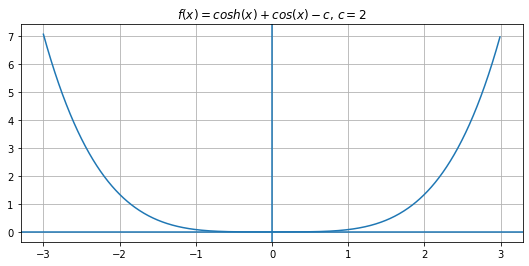

In [71]:
c = 2
f = g(c)

# Hint: search_range = np.arange(左端點, 右端點, 點與點之間距), 
# e.g. search_range = np.arange(0.0, 1.0, 0.01)
# ===== 請實做程式 =====
search_range = np.arange(-3.0, 3.0, 0.01)
# ====================

fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(x)=cosh(x)+cos(x)-c$, $c=$%d' % c)
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### According to the figure above, estimate the zero of $f$.

#### For example, 

~~~python
root = 3        # 單根
root = -2, 1    # 多根
root = None     # 無解
~~~

In [72]:
# Hint: root = ?
# ===== 請實做程式 =====
root = newton(
    g(2), 
    df, 
    1.2, 
    tolerance=1e-10,
    max_iterations=10000,  
    report_history=False
)
# ====================

In [73]:
print('My estimation of root:', root)


My estimation of root: 0.005076987588160775


### Try to find the zero with a tolerance of $10^{-10}$. If it works, plot the error and estimation of each step. Otherwise, state the reason why the method failed on this case.

In [74]:
solution, history = newton(
    f, 
    df,
    1.2,
    tolerance=1e-10,
    max_iterations=10000,
    report_history=True
)

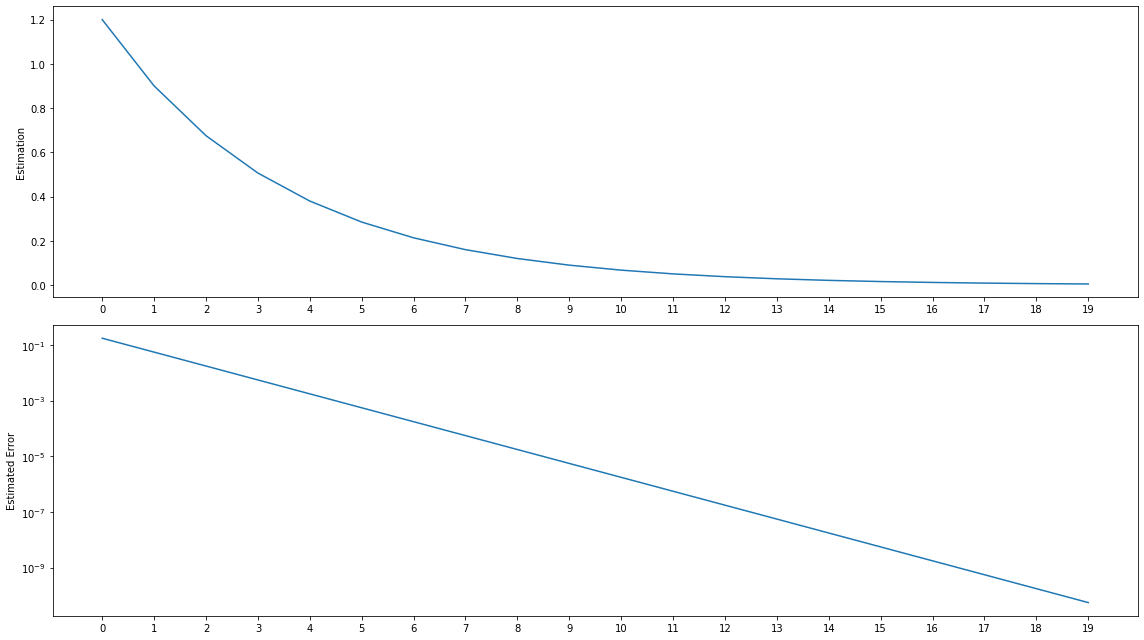

In [75]:
fig, axes = plt.subplots(2, 1, figsize=(16, 9))
ax1, ax2 = axes

num_iterations = len(history['estimation'])
iterations = range(num_iterations)
for ax in axes:
    ax.set_xticks(iterations)

ax1.plot(iterations, history['estimation'])
ax1.set_ylabel('Estimation')

ax2.plot(iterations, history['error'])
ax2.set_ylabel('Estimated Error')
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

---

### 5. Answer the following questions under the case $c=3$.

### Plot the function to find an interval that contains the zeros of $f$ if possible.

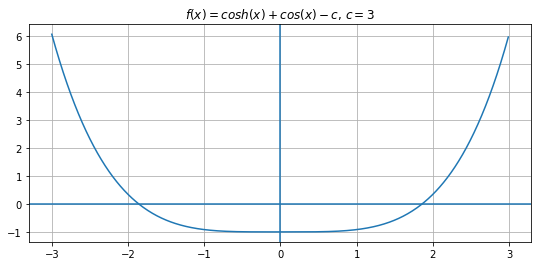

In [76]:
c = 3
f = g(c)

# Hint: search_range = np.arange(左端點, 右端點, 點與點之間距), 
# e.g. search_range = np.arange(0.0, 1.0, 0.01)
# ===== 請實做程式 =====
search_range = np.arange(-3.0, 3.0, 0.01)
# ====================

fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(x)=cosh(x)+cos(x)-c$, $c=$%d' % c)
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### According to the figure above, estimate the zero of $f$.

#### For example, 

~~~python
root = 3        # 單根
root = -2, 1    # 多根
root = None     # 無解
~~~

In [77]:
# Hint: root = ?
# ===== 請實做程式 =====
root = newton(g(3),df,1.2,tolerance=1e-7,max_iterations=100,report_history=False),newton(g(3),df,-1.2,tolerance=1e-7,max_iterations=100,report_history=False)
# ====================

In [78]:
print('My estimation of root:', root)


My estimation of root: (1.857920829167302, -1.857920829167302)


### Try to find the zero with a tolerance of $10^{-10}$. If it works, plot the error and estimation of each step. Otherwise, state the reason why the method failed on this case.

In [79]:
solution, history=newton(g(3),df,1.2,tolerance=1e-10,max_iterations=1000,report_history=True)

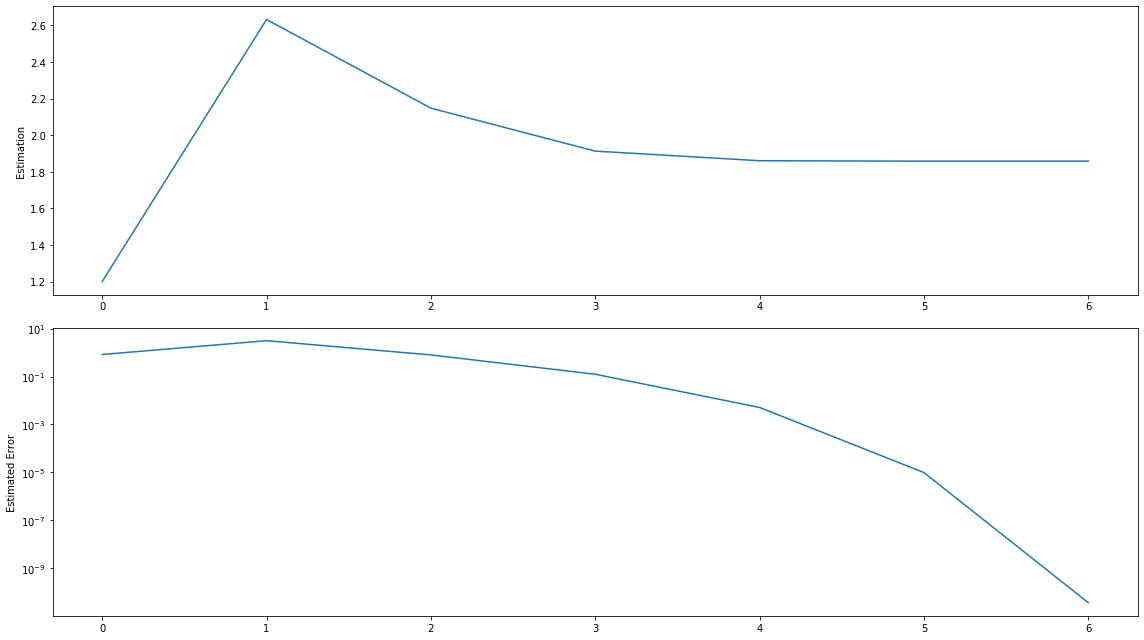

In [80]:
fig, axes = plt.subplots(2, 1, figsize=(16, 9))
ax1, ax2 = axes

num_iterations = len(history['estimation'])
iterations = range(num_iterations)
for ax in axes:
    ax.set_xticks(iterations)

ax1.plot(iterations, history['estimation'])
ax1.set_ylabel('Estimation')

ax2.plot(iterations, history['error'])
ax2.set_ylabel('Estimated Error')
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

In [81]:
solution, history=newton(g(3),df,-1.2,tolerance=1e-10,max_iterations=1000,report_history=True)

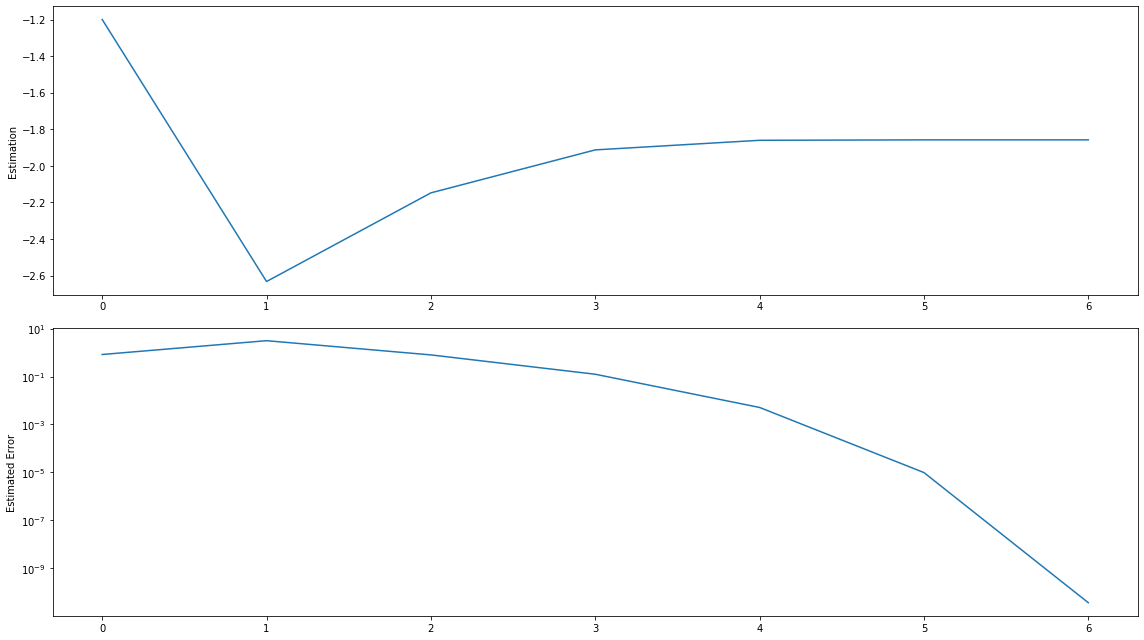

In [82]:
fig, axes = plt.subplots(2, 1, figsize=(16, 9))
ax1, ax2 = axes

num_iterations = len(history['estimation'])
iterations = range(num_iterations)
for ax in axes:
    ax.set_xticks(iterations)

ax1.plot(iterations, history['estimation'])
ax1.set_ylabel('Estimation')

ax2.plot(iterations, history['error'])
ax2.set_ylabel('Estimated Error')
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

---

## Discussion

### For all cases above(c=1,2,3), do the results(e.g. error behaviors, estimations, etc) agree with the theoretical analysis?

請點此cell兩下開始作答（如要打文字記得選Markdown, 寫程式則選Code, 一個cell不夠可以再新增在下方）

yes!